In [28]:
# First thing, Copy the code from the previous day "SingledeviceRC"
# That branch has the code that we will still be working on today.
# Essentially my dataframe is a singular device that is recording the max, min, avg, and mdev latency every 5 minutes for the month of october.

In [29]:
#This cell imports the entire dataframe from the one device for the month of october 
import pandas as pd
import numpy as np
rc_device = pd.read_csv('/srv/data/my_shared_data_folder/internet-equity/device_data_oct21/nm-mngd-20210518-075ab2f0.csv')
rc_device

,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0,avg,60615,xfinity,37.488,beta,98.206.160.0,0.1
0,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,40.056,beta,98.206.160.0,0
1,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,mdev,60615,xfinity,1.094,beta,98.206.160.0,0
2,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,min,60615,xfinity,36.042,beta,98.206.160.0,0
3,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Chicago,0.0,avg,60615,xfinity,12.619,beta,98.206.160.0,0
4,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Chicago,0.0,max,60615,xfinity,13.832,beta,98.206.160.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469526,2021-10-26 06:55:59,nm-mngd-20210518-075ab2f0,last_mile_rtt,rtt,icmp,Cloudflare,0.0,ping_mdev,60615,xfinity,0.396,beta,98.206.160.0,0
469527,2021-10-26 06:55:59,nm-mngd-20210518-075ab2f0,last_mile_rtt,rtt,icmp,Cloudflare,0.0,ping_min,60615,xfinity,8.436,beta,98.206.160.0,0
469528,2021-10-26 06:55:59,nm-mngd-20210518-075ab2f0,last_mile_rtt,rtt,icmp,Cloudflare,0.0,tr_max,60615,xfinity,8.597,beta,98.206.160.0,0
469529,2021-10-26 06:55:59,nm-mngd-20210518-075ab2f0,last_mile_rtt,rtt,icmp,Cloudflare,0.0,tr_median,60615,xfinity,8.589,beta,98.206.160.0,0


In [30]:
# However the header of the column is an actual row, and should be within the dataframe not the header of the data frame 
# I am going to set the header to none which will put the previous header within the dataframe and then I am going to rename the columns the correct names
import pandas as pd
import numpy as np
rc_device = pd.read_csv('/srv/data/my_shared_data_folder/internet-equity/device_data_oct21/nm-mngd-20210518-075ab2f0.csv', header=None)
rc_device
rc_device.rename(columns={0:'time',1:'deviceid',2:'tool',3:'direction',4:'protocol',5:'target',6:'pktloss',7:'method',8:'zip',9:'isp',10:'value',11:'topic',12:'annonipaddr',13:'ipaddrchanged'},inplace=True)
rc_device


,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,annonipaddr,ipaddrchanged
0,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,avg,60615,xfinity,37.488,beta,98.206.160.0,0
1,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,40.056,beta,98.206.160.0,0
2,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,mdev,60615,xfinity,1.094,beta,98.206.160.0,0
3,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,min,60615,xfinity,36.042,beta,98.206.160.0,0
4,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Chicago,0.0,avg,60615,xfinity,12.619,beta,98.206.160.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469527,2021-10-26 06:55:59,nm-mngd-20210518-075ab2f0,last_mile_rtt,rtt,icmp,Cloudflare,0.0,ping_mdev,60615,xfinity,0.396,beta,98.206.160.0,0
469528,2021-10-26 06:55:59,nm-mngd-20210518-075ab2f0,last_mile_rtt,rtt,icmp,Cloudflare,0.0,ping_min,60615,xfinity,8.436,beta,98.206.160.0,0
469529,2021-10-26 06:55:59,nm-mngd-20210518-075ab2f0,last_mile_rtt,rtt,icmp,Cloudflare,0.0,tr_max,60615,xfinity,8.597,beta,98.206.160.0,0
469530,2021-10-26 06:55:59,nm-mngd-20210518-075ab2f0,last_mile_rtt,rtt,icmp,Cloudflare,0.0,tr_median,60615,xfinity,8.589,beta,98.206.160.0,0


In [31]:
#seperate the data and hours(why), make each a column and add both as two seperate columns at the end of the dataframe.
#Accomplished this by making a function 
def split_hour(x):
    row = x
    return row[11:13]

rc_device.loc[:,"hour"] = rc_device.loc[:,"time"].apply(split_hour)
rc_device


,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,annonipaddr,ipaddrchanged,hour
0,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,avg,60615,xfinity,37.488,beta,98.206.160.0,0,03
1,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,40.056,beta,98.206.160.0,0,03
2,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,mdev,60615,xfinity,1.094,beta,98.206.160.0,0,03
3,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,min,60615,xfinity,36.042,beta,98.206.160.0,0,03
4,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Chicago,0.0,avg,60615,xfinity,12.619,beta,98.206.160.0,0,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469527,2021-10-26 06:55:59,nm-mngd-20210518-075ab2f0,last_mile_rtt,rtt,icmp,Cloudflare,0.0,ping_mdev,60615,xfinity,0.396,beta,98.206.160.0,0,06
469528,2021-10-26 06:55:59,nm-mngd-20210518-075ab2f0,last_mile_rtt,rtt,icmp,Cloudflare,0.0,ping_min,60615,xfinity,8.436,beta,98.206.160.0,0,06
469529,2021-10-26 06:55:59,nm-mngd-20210518-075ab2f0,last_mile_rtt,rtt,icmp,Cloudflare,0.0,tr_max,60615,xfinity,8.597,beta,98.206.160.0,0,06
469530,2021-10-26 06:55:59,nm-mngd-20210518-075ab2f0,last_mile_rtt,rtt,icmp,Cloudflare,0.0,tr_median,60615,xfinity,8.589,beta,98.206.160.0,0,06


In [32]:
#do the same thing that we did previously but with dates
def split_date(x):
    row = x
    return row[:10]

rc_device.loc[:,"date"] = rc_device.loc[:,"time"].apply(split_date)
rc_device
#now we have two new columns with just the date and just the hour.

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,annonipaddr,ipaddrchanged,hour,date
0,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,avg,60615,xfinity,37.488,beta,98.206.160.0,0,03,2021-10-16
1,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,40.056,beta,98.206.160.0,0,03,2021-10-16
2,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,mdev,60615,xfinity,1.094,beta,98.206.160.0,0,03,2021-10-16
3,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,min,60615,xfinity,36.042,beta,98.206.160.0,0,03,2021-10-16
4,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Chicago,0.0,avg,60615,xfinity,12.619,beta,98.206.160.0,0,03,2021-10-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469527,2021-10-26 06:55:59,nm-mngd-20210518-075ab2f0,last_mile_rtt,rtt,icmp,Cloudflare,0.0,ping_mdev,60615,xfinity,0.396,beta,98.206.160.0,0,06,2021-10-26
469528,2021-10-26 06:55:59,nm-mngd-20210518-075ab2f0,last_mile_rtt,rtt,icmp,Cloudflare,0.0,ping_min,60615,xfinity,8.436,beta,98.206.160.0,0,06,2021-10-26
469529,2021-10-26 06:55:59,nm-mngd-20210518-075ab2f0,last_mile_rtt,rtt,icmp,Cloudflare,0.0,tr_max,60615,xfinity,8.597,beta,98.206.160.0,0,06,2021-10-26
469530,2021-10-26 06:55:59,nm-mngd-20210518-075ab2f0,last_mile_rtt,rtt,icmp,Cloudflare,0.0,tr_median,60615,xfinity,8.589,beta,98.206.160.0,0,06,2021-10-26


In [33]:
#We are only looking at the target server Atlanta
#make a new dataframe with just atlanta target.
rc_device_atl = rc_device.loc[rc_device['target'] == 'Atlanta']
rc_device_atl

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,annonipaddr,ipaddrchanged,hour,date
0,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,avg,60615,xfinity,37.488,beta,98.206.160.0,0,03,2021-10-16
1,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,40.056,beta,98.206.160.0,0,03,2021-10-16
2,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,mdev,60615,xfinity,1.094,beta,98.206.160.0,0,03,2021-10-16
3,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,min,60615,xfinity,36.042,beta,98.206.160.0,0,03,2021-10-16
77,2021-10-16 11:05:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,avg,60615,xfinity,37.849,beta,98.206.160.0,0,11,2021-10-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469381,2021-10-26 11:26:01,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,min,60615,xfinity,36.837,beta,98.206.160.0,0,11,2021-10-26
469455,2021-10-26 06:55:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,avg,60615,xfinity,36.785,beta,98.206.160.0,0,06,2021-10-26
469456,2021-10-26 06:55:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,37.600,beta,98.206.160.0,0,06,2021-10-26
469457,2021-10-26 06:55:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,mdev,60615,xfinity,0.544,beta,98.206.160.0,0,06,2021-10-26


In [34]:
#make a dataframes for just the max, min, avg, and mdev
#This one is for the max
rc_device_atlmax= rc_device_atl.loc[rc_device_atl['method'] == 'max']
rc_device_atlmax


,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,annonipaddr,ipaddrchanged,hour,date
1,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,40.056,beta,98.206.160.0,0,03,2021-10-16
78,2021-10-16 11:05:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,42.617,beta,98.206.160.0,0,11,2021-10-16
155,2021-10-16 09:06:01,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,39.620,beta,98.206.160.0,0,09,2021-10-16
236,2021-10-16 07:10:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,39.826,beta,98.206.160.0,0,07,2021-10-16
313,2021-10-16 05:50:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,39.339,beta,98.206.160.0,0,05,2021-10-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469148,2021-10-26 12:00:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,43.628,beta,98.206.160.0,0,12,2021-10-26
469225,2021-10-26 12:10:57,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,38.233,beta,98.206.160.0,0,12,2021-10-26
469302,2021-10-26 04:06:01,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,42.979,beta,98.206.160.0,0,04,2021-10-26
469379,2021-10-26 11:26:01,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,38.386,beta,98.206.160.0,0,11,2021-10-26


In [35]:
#This dataframe is for the min
rc_device_atlmin= rc_device_atl.loc[rc_device_atl['method'] == 'min']
rc_device_atlmin

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,annonipaddr,ipaddrchanged,hour,date
3,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,min,60615,xfinity,36.042,beta,98.206.160.0,0,03,2021-10-16
80,2021-10-16 11:05:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,min,60615,xfinity,35.920,beta,98.206.160.0,0,11,2021-10-16
157,2021-10-16 09:06:01,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,min,60615,xfinity,36.103,beta,98.206.160.0,0,09,2021-10-16
238,2021-10-16 07:10:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,min,60615,xfinity,36.512,beta,98.206.160.0,0,07,2021-10-16
315,2021-10-16 05:50:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,min,60615,xfinity,35.939,beta,98.206.160.0,0,05,2021-10-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469150,2021-10-26 12:00:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,min,60615,xfinity,36.362,beta,98.206.160.0,0,12,2021-10-26
469227,2021-10-26 12:10:57,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,min,60615,xfinity,36.492,beta,98.206.160.0,0,12,2021-10-26
469304,2021-10-26 04:06:01,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,min,60615,xfinity,36.151,beta,98.206.160.0,0,04,2021-10-26
469381,2021-10-26 11:26:01,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,min,60615,xfinity,36.837,beta,98.206.160.0,0,11,2021-10-26


In [36]:
#This dataframe is for the the avg 
rc_device_atlavg= rc_device_atl.loc[rc_device_atl['method'] == 'avg']
rc_device_atlavg

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,annonipaddr,ipaddrchanged,hour,date
0,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,avg,60615,xfinity,37.488,beta,98.206.160.0,0,03,2021-10-16
77,2021-10-16 11:05:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,avg,60615,xfinity,37.849,beta,98.206.160.0,0,11,2021-10-16
154,2021-10-16 09:06:01,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,avg,60615,xfinity,37.539,beta,98.206.160.0,0,09,2021-10-16
235,2021-10-16 07:10:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,avg,60615,xfinity,37.598,beta,98.206.160.0,0,07,2021-10-16
312,2021-10-16 05:50:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,avg,60615,xfinity,37.085,beta,98.206.160.0,0,05,2021-10-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469147,2021-10-26 12:00:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,avg,60615,xfinity,37.952,beta,98.206.160.0,0,12,2021-10-26
469224,2021-10-26 12:10:57,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,avg,60615,xfinity,37.498,beta,98.206.160.0,0,12,2021-10-26
469301,2021-10-26 04:06:01,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,avg,60615,xfinity,37.591,beta,98.206.160.0,0,04,2021-10-26
469378,2021-10-26 11:26:01,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,avg,60615,xfinity,37.789,beta,98.206.160.0,0,11,2021-10-26


In [37]:
#This dataframe is for the mdev
rc_device_atlmdev= rc_device_atl.loc[rc_device_atl['method'] == 'mdev']
rc_device_atlmdev

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,annonipaddr,ipaddrchanged,hour,date
2,2021-10-16 03:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,mdev,60615,xfinity,1.094,beta,98.206.160.0,0,03,2021-10-16
79,2021-10-16 11:05:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,mdev,60615,xfinity,2.163,beta,98.206.160.0,0,11,2021-10-16
156,2021-10-16 09:06:01,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,mdev,60615,xfinity,0.921,beta,98.206.160.0,0,09,2021-10-16
237,2021-10-16 07:10:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,mdev,60615,xfinity,0.964,beta,98.206.160.0,0,07,2021-10-16
314,2021-10-16 05:50:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,mdev,60615,xfinity,1.037,beta,98.206.160.0,0,05,2021-10-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469149,2021-10-26 12:00:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,mdev,60615,xfinity,2.015,beta,98.206.160.0,0,12,2021-10-26
469226,2021-10-26 12:10:57,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,mdev,60615,xfinity,0.578,beta,98.206.160.0,0,12,2021-10-26
469303,2021-10-26 04:06:01,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,mdev,60615,xfinity,1.909,beta,98.206.160.0,0,04,2021-10-26
469380,2021-10-26 11:26:01,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,mdev,60615,xfinity,0.536,beta,98.206.160.0,0,11,2021-10-26


In [38]:
#Todays objective require me to work with the max data from the device which i already make a dataframe for called 'rc_device_atlmax'
#I am going to change the column hour into intengers making it easier to work with later on.
#then will print the dtypes to corfirm if it changed.
rc_device_atlmax.hour = rc_device_atlmax['hour'].astype('int')
print(rc_device_atlmax.dtypes)

time              object
deviceid          object
tool              object
direction         object
protocol          object
target            object
pktloss          float64
method            object
zip                int64
isp               object
value            float64
topic             object
annonipaddr       object
ipaddrchanged      int64
hour               int64
date              object
dtype: object


/tmp/ipykernel_1048118/148648071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc_device_atlmax.hour = rc_device_atlmax['hour'].astype('int')


In [39]:
#One object today was to look at 7 days from the dataframe.
#Make a random sample of seven days from the atlanta max dataframe rc_device_atlmax
rc_device_atlmax['date'].sample(7, replace=False)



189299    2021-10-19
221610    2021-10-12
117602    2021-10-15
357827    2021-10-21
292097    2021-10-01
370381    2021-10-21
316293    2021-10-17
Name: date, dtype: object

In [43]:
#Now we have the random sample of seven dates to use. 
#Make a subset for each day, make sure your making using the dataframe rc_device_atlmax
#This one is for the day 10-19
rc_device_atlmax_1019 = rc_device_atlmax.loc[rc_device_atlmax['date'] == '2021-10-19']
rc_device_atlmax_1019


,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,annonipaddr,ipaddrchanged,hour,date
184562,2021-10-19 23:10:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,47.470,beta,98.206.160.0,0,23,2021-10-19
185105,2021-10-19 21:45:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,44.517,beta,98.206.160.0,0,21,2021-10-19
185182,2021-10-19 22:20:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,54.113,beta,98.206.160.0,0,22,2021-10-19
185879,2021-10-19 20:05:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,42.322,beta,98.206.160.0,0,20,2021-10-19
186187,2021-10-19 20:45:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,48.488,beta,98.206.160.0,0,20,2021-10-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394618,2021-10-19 08:35:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,38.775,beta,98.206.160.0,0,8,2021-10-19
394772,2021-10-19 00:25:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,42.658,beta,98.206.160.0,0,0,2021-10-19
394853,2021-10-19 11:45:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,41.247,beta,98.206.160.0,0,11,2021-10-19
394930,2021-10-19 12:11:00,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,43.703,beta,98.206.160.0,0,12,2021-10-19


In [44]:
#This subset is for 10/12
rc_device_atlmax_1012 = rc_device_atlmax.loc[rc_device_atlmax['date'] == '2021-10-12']
rc_device_atlmax_1012


,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,annonipaddr,ipaddrchanged,hour,date
206857,2021-10-12 01:25:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,37.954,beta,98.206.160.0,0,1,2021-10-12
207088,2021-10-12 10:45:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,38.603,beta,98.206.160.0,0,10,2021-10-12
207165,2021-10-12 09:20:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,38.653,beta,98.206.160.0,0,9,2021-10-12
207327,2021-10-12 15:10:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,41.910,beta,98.206.160.0,0,15,2021-10-12
207404,2021-10-12 12:21:07,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,49.661,beta,98.206.160.0,0,12,2021-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415403,2021-10-12 23:10:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,48.784,beta,98.206.160.0,0,23,2021-10-12
416029,2021-10-12 21:20:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,38.980,beta,98.206.160.0,0,21,2021-10-12
416418,2021-10-12 20:05:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,41.489,beta,98.206.160.0,0,20,2021-10-12
416649,2021-10-12 23:35:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,46.582,beta,98.206.160.0,0,23,2021-10-12


In [45]:
#This subset is for 10/15
rc_device_atlmax_1015 = rc_device_atlmax.loc[rc_device_atlmax['date'] == '2021-10-15']
rc_device_atlmax_1015

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,annonipaddr,ipaddrchanged,hour,date
1087,2021-10-15 21:30:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,42.061,beta,98.206.160.0,0,21,2021-10-15
1168,2021-10-15 22:55:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,39.691,beta,98.206.160.0,0,22,2021-10-15
1245,2021-10-15 20:15:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,44.198,beta,98.206.160.0,0,20,2021-10-15
1634,2021-10-15 19:30:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,38.650,beta,98.206.160.0,0,19,2021-10-15
1711,2021-10-15 20:55:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,43.142,beta,98.206.160.0,0,20,2021-10-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138705,2021-10-15 07:35:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,39.819,beta,98.206.160.0,0,7,2021-10-15
138859,2021-10-15 11:20:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,38.801,beta,98.206.160.0,0,11,2021-10-15
138944,2021-10-15 02:31:00,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,38.288,beta,98.206.160.0,0,2,2021-10-15
139021,2021-10-15 14:45:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,38.356,beta,98.206.160.0,0,14,2021-10-15


In [46]:
#This subset is for 10/21
rc_device_atlmax_1021 = rc_device_atlmax.loc[rc_device_atlmax['date'] == '2021-10-21']
rc_device_atlmax_1021

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,annonipaddr,ipaddrchanged,hour,date
250616,2021-10-21 22:35:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,40.550,beta,98.206.160.0,0,22,2021-10-21
250697,2021-10-21 23:05:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,47.353,beta,98.206.160.0,0,23,2021-10-21
250851,2021-10-21 20:21:00,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,44.464,beta,98.206.160.0,0,20,2021-10-21
251477,2021-10-21 19:36:00,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,42.263,beta,98.206.160.0,0,19,2021-10-21
251554,2021-10-21 21:35:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,49.561,beta,98.206.160.0,0,21,2021-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372376,2021-10-21 11:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,39.116,beta,98.206.160.0,0,11,2021-10-21
372453,2021-10-21 15:30:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,42.280,beta,98.206.160.0,0,15,2021-10-21
372530,2021-10-21 18:15:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,40.175,beta,98.206.160.0,0,18,2021-10-21
372607,2021-10-21 05:15:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,46.036,beta,98.206.160.0,0,5,2021-10-21


In [47]:
#This subset is for 10/01
rc_device_atlmax_1001 = rc_device_atlmax.loc[rc_device_atlmax['date'] == '2021-10-01']
rc_device_atlmax_1001

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,annonipaddr,ipaddrchanged,hour,date
289976,2021-10-01 17:51:00,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,42.366,beta,98.206.160.0,0,17,2021-10-01
290053,2021-10-01 18:05:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,41.493,beta,98.206.160.0,0,18,2021-10-01
290130,2021-10-01 19:05:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,42.628,beta,98.206.160.0,0,19,2021-10-01
290207,2021-10-01 20:51:01,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,41.072,beta,98.206.160.0,0,20,2021-10-01
290284,2021-10-01 21:45:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,37.206,beta,98.206.160.0,0,21,2021-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303523,2021-10-01 22:01:00,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,37.543,beta,98.206.160.0,0,22,2021-10-01
303754,2021-10-01 21:16:00,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,39.031,beta,98.206.160.0,0,21,2021-10-01
303831,2021-10-01 20:15:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,40.395,beta,98.206.160.0,0,20,2021-10-01
304299,2021-10-01 22:15:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,37.095,beta,98.206.160.0,0,22,2021-10-01


In [48]:
#This subset is should be 10/21 based on the random sample code however being that I already have a subset of that day and the objective was to look at 7 different days Im going to chose a random day to eliminate doing a duplicate day.
#The new date picked is 10/07
rc_device_atlmax_1007 = rc_device_atlmax.loc[rc_device_atlmax['date'] == '2021-10-07']
rc_device_atlmax_1007

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,annonipaddr,ipaddrchanged,hour,date
67487,2021-10-07 21:55:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,38.052,beta,98.206.160.0,0,21,2021-10-07
68741,2021-10-07 20:55:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,43.114,beta,98.206.160.0,0,20,2021-10-07
69053,2021-10-07 19:30:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,38.372,beta,98.206.160.0,0,19,2021-10-07
69361,2021-10-07 19:55:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,43.333,beta,98.206.160.0,0,19,2021-10-07
69438,2021-10-07 20:30:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,42.150,beta,98.206.160.0,0,20,2021-10-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439390,2021-10-07 10:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,39.176,beta,98.206.160.0,0,10,2021-10-07
439548,2021-10-07 17:30:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,41.202,beta,98.206.160.0,0,17,2021-10-07
439625,2021-10-07 03:06:01,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,39.174,beta,98.206.160.0,0,3,2021-10-07
439712,2021-10-07 18:55:59,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,41.507,beta,98.206.160.0,0,18,2021-10-07


In [49]:
#This subset is for 10/17
rc_device_atlmax_1017 = rc_device_atlmax.loc[rc_device_atlmax['date'] == '2021-10-17']
rc_device_atlmax_1017

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,annonipaddr,ipaddrchanged,hour,date
227801,2021-10-17 22:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,41.671,beta,98.206.160.0,0,22,2021-10-17
227959,2021-10-17 21:25:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,40.016,beta,98.206.160.0,0,21,2021-10-17
229284,2021-10-17 22:00:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,42.497,beta,98.206.160.0,0,22,2021-10-17
229361,2021-10-17 20:40:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,38.771,beta,98.206.160.0,0,20,2021-10-17
229515,2021-10-17 23:50:57,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,45.511,beta,98.206.160.0,0,23,2021-10-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327428,2021-10-17 06:55:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,38.666,beta,98.206.160.0,0,6,2021-10-17
327505,2021-10-17 05:20:57,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,40.250,beta,98.206.160.0,0,5,2021-10-17
327582,2021-10-17 05:30:58,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,38.259,beta,98.206.160.0,0,5,2021-10-17
327659,2021-10-17 01:30:57,nm-mngd-20210518-075ab2f0,ping_latency,rtt,icmp,Atlanta,0.0,max,60615,xfinity,38.395,beta,98.206.160.0,0,1,2021-10-17


([<matplotlib.axis.XTick at 0x7f87b199b6a0>,
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16'),
  Text(17.0, 0, '17'),
  Text(18.0, 0, '18'),
  Text(19.0, 0, '19'),
  Text(20.0, 0, '20'),
  Text(21.0, 0, '21'),
  Text(22.0, 0, '22'),
  Text(23.0, 0, '23')])

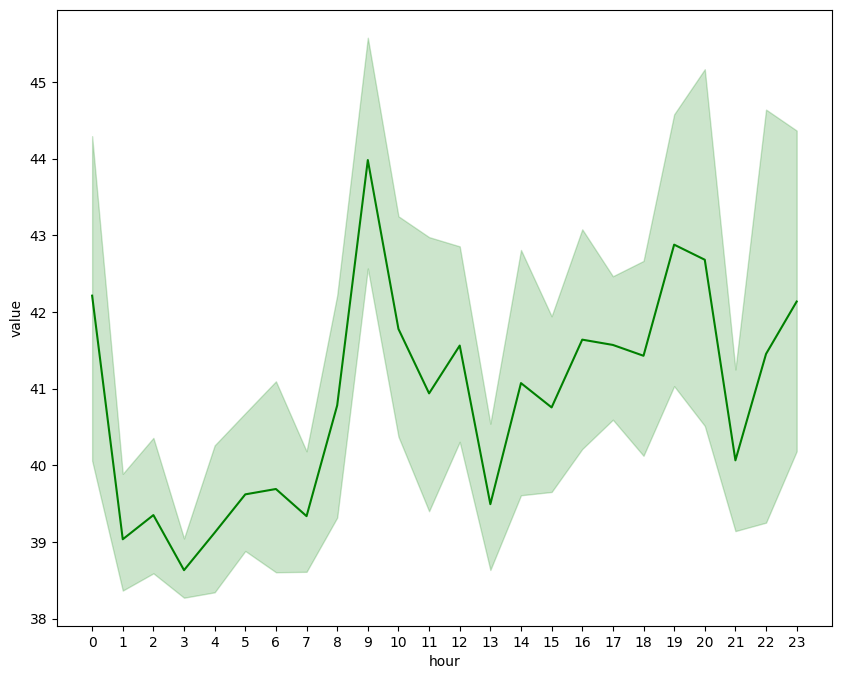

In [53]:
#Time series plot of the maxes from the date 10/19 (from the one device)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig,ax =  plt.subplots(figsize = ( 10, 8))
sns.lineplot( x = "hour", y = "value",
             color = 'green', data =rc_device_atlmax_1019,
             ax = ax)
plt.xticks(np.arange(min(rc_device_atlmax_1019['hour']), max(rc_device_atlmax_1019['hour'])+1, 1.0))

([<matplotlib.axis.XTick at 0x7f87b18d8640>,
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16'),
  Text(17.0, 0, '17'),
  Text(18.0, 0, '18'),
  Text(19.0, 0, '19'),
  Text(20.0, 0, '20'),
  Text(21.0, 0, '21'),
  Text(22.0, 0, '22'),
  Text(23.0, 0, '23')])

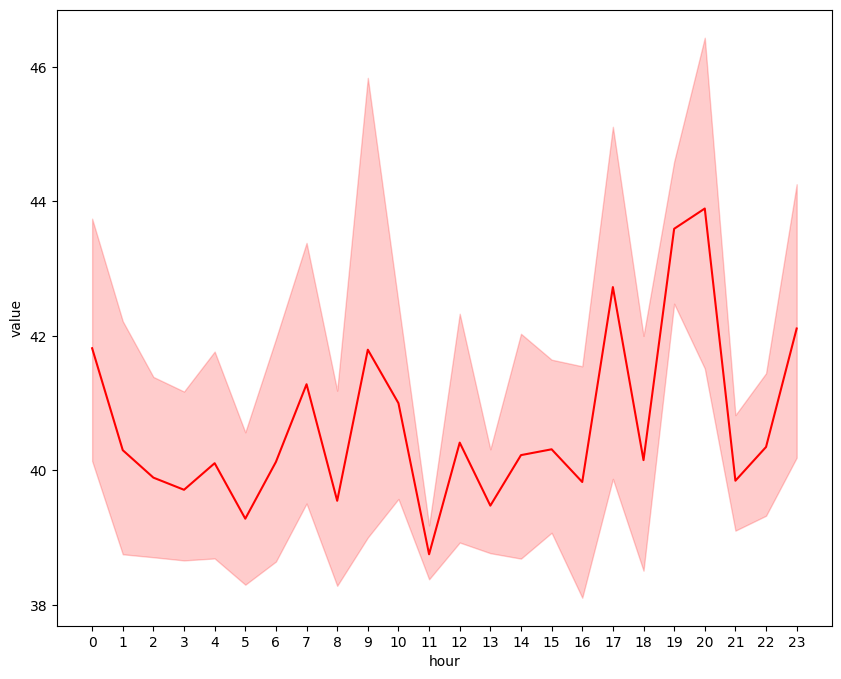

In [54]:
#Time series plot of the maxes from the date 10/12 (from the one device)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig,ax =  plt.subplots(figsize = ( 10, 8))
sns.lineplot( x = "hour", y = "value",
             color = 'red', data =rc_device_atlmax_1012,
             ax = ax)
plt.xticks(np.arange(min(rc_device_atlmax_1012['hour']), max(rc_device_atlmax_1012['hour'])+1, 1.0))

([<matplotlib.axis.XTick at 0x7f87b1812a30>,
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16'),
  Text(17.0, 0, '17'),
  Text(18.0, 0, '18'),
  Text(19.0, 0, '19'),
  Text(20.0, 0, '20'),
  Text(21.0, 0, '21'),
  Text(22.0, 0, '22'),
  Text(23.0, 0, '23')])

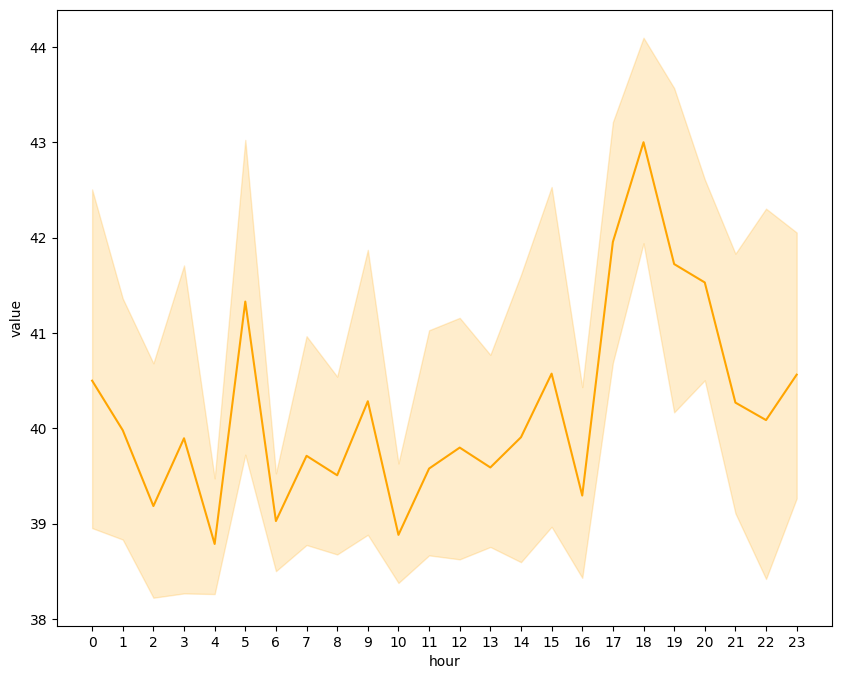

In [55]:
#Time series plot of the maxes from the date 10/15 (from the one device)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig,ax =  plt.subplots(figsize = ( 10, 8))
sns.lineplot( x = "hour", y = "value",
             color = 'orange', data =rc_device_atlmax_1015,
             ax = ax)
plt.xticks(np.arange(min(rc_device_atlmax_1015['hour']), max(rc_device_atlmax_1015['hour'])+1, 1.0))

([<matplotlib.axis.XTick at 0x7f87b169c0a0>,
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16'),
  Text(17.0, 0, '17'),
  Text(18.0, 0, '18'),
  Text(19.0, 0, '19'),
  Text(20.0, 0, '20'),
  Text(21.0, 0, '21'),
  Text(22.0, 0, '22'),
  Text(23.0, 0, '23')])

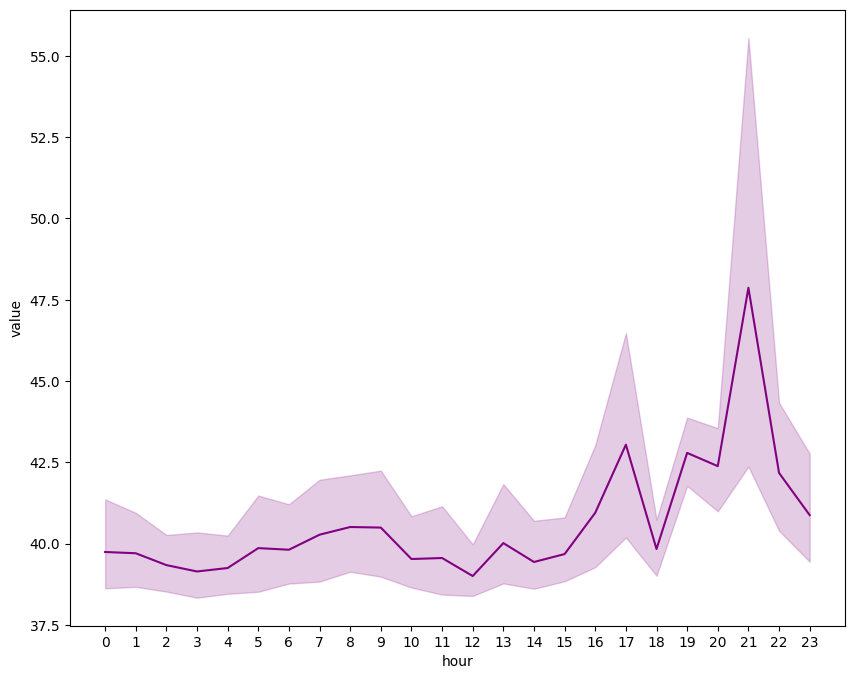

In [57]:
#Time series plot of the maxes from the date 10/21 (from the one device)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig,ax =  plt.subplots(figsize = ( 10, 8))
sns.lineplot( x = "hour", y = "value",
             color = 'purple', data =rc_device_atlmax_1021,
             ax = ax)
plt.xticks(np.arange(min(rc_device_atlmax_1021['hour']), max(rc_device_atlmax_1021['hour'])+1, 1.0))

([<matplotlib.axis.XTick at 0x7f87b1282f70>,
 [Text(16.0, 0, '16'),
  Text(17.0, 0, '17'),
  Text(18.0, 0, '18'),
  Text(19.0, 0, '19'),
  Text(20.0, 0, '20'),
  Text(21.0, 0, '21'),
  Text(22.0, 0, '22')])

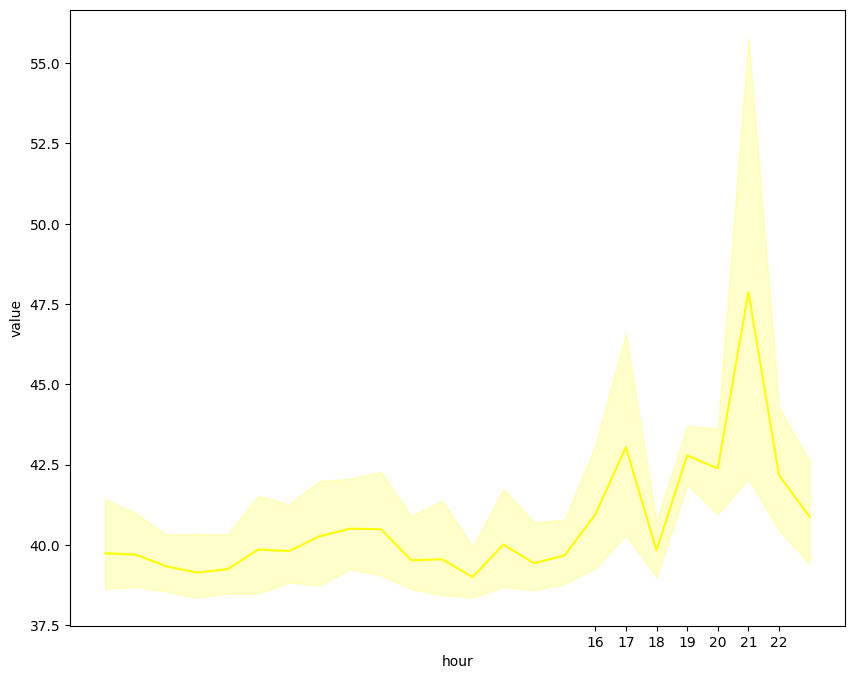

In [64]:
#Time series plot of the maxes from the date 10/01 (from the one device)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig,ax =  plt.subplots(figsize = ( 10, 8))
sns.lineplot( x = "hour", y = "value",
             color = 'yellow', data =rc_device_atlmax_1021,
             ax = ax)
plt.xticks(np.arange(min(rc_device_atlmax_1001['hour']), max(rc_device_atlmax_1001['hour'])+1, 1.0))

([<matplotlib.axis.XTick at 0x7f87b133c070>,
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16'),
  Text(17.0, 0, '17'),
  Text(18.0, 0, '18'),
  Text(19.0, 0, '19'),
  Text(20.0, 0, '20'),
  Text(21.0, 0, '21'),
  Text(22.0, 0, '22'),
  Text(23.0, 0, '23')])

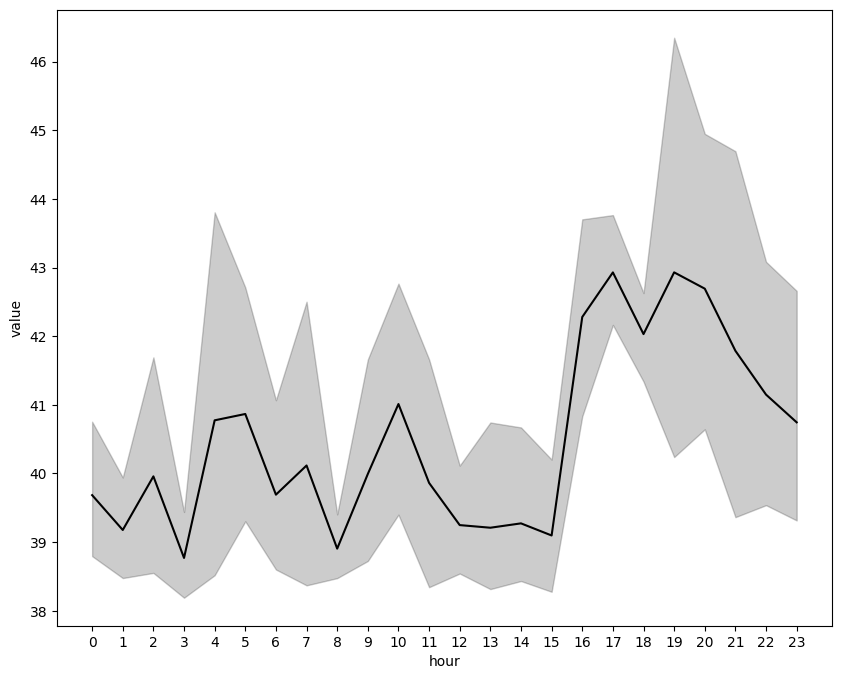

In [63]:
#Time series plot of the maxes from the date 10/07 (from the one device) 
#remember that the random sample gave us two dates that were the same so we picked a different date for one of them which is 10/07
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig,ax =  plt.subplots(figsize = ( 10, 8))
sns.lineplot( x = "hour", y = "value",
             color = 'black', data =rc_device_atlmax_1007,
             ax = ax)
plt.xticks(np.arange(min(rc_device_atlmax_1007['hour']), max(rc_device_atlmax_1007['hour'])+1, 1.0))

([<matplotlib.axis.XTick at 0x7f87b13faee0>,
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16'),
  Text(17.0, 0, '17'),
  Text(18.0, 0, '18'),
  Text(19.0, 0, '19'),
  Text(20.0, 0, '20'),
  Text(21.0, 0, '21'),
  Text(22.0, 0, '22'),
  Text(23.0, 0, '23')])

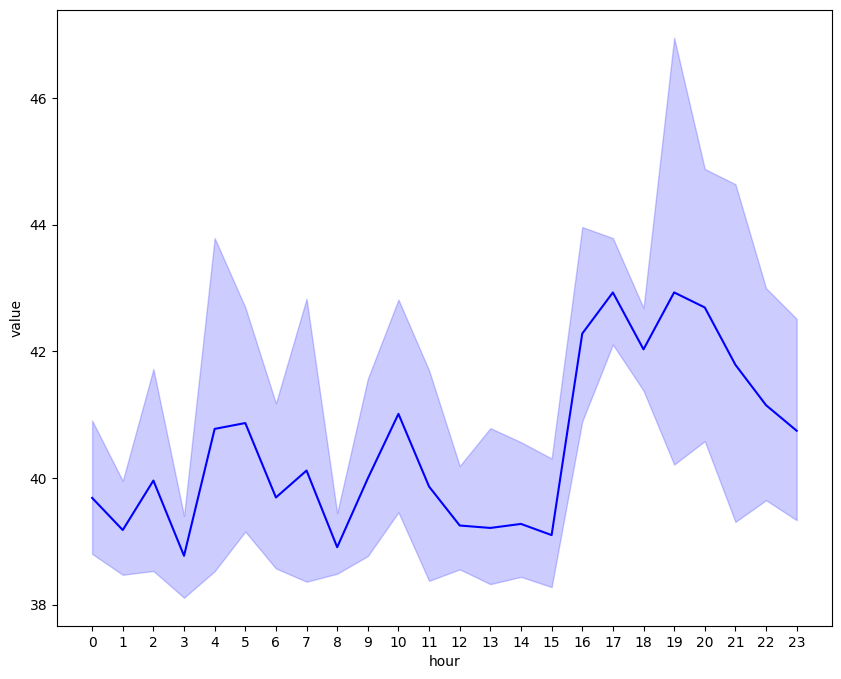

In [62]:
#Time series plot of the maxes from the date 10/17 (from the one device) 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig,ax =  plt.subplots(figsize = ( 10, 8))
sns.lineplot( x = "hour", y = "value",
             color = 'blue', data =rc_device_atlmax_1007,
             ax = ax)
plt.xticks(np.arange(min(rc_device_atlmax_1017['hour']), max(rc_device_atlmax_1017['hour'])+1, 1.0))

In [77]:
#Based on the time series plots from the individual day dataframe/subset. I determined an anomaly is probably 42 and greater
#Now create a function that gos through and identifies an anomaly.
def anomaly_detec(x):
    anomaly_sum=0
    if x >= 42:
        anomaly_sum +=1
    else:
        pass
    return anomaly_sum

    
    


In [78]:
anomaly_count = rc_device_atlmax_1012['value'].apply(anomaly_detec)
anomaly_count

206857    0
207088    0
207165    0
207327    0
207404    1
         ..
415403    1
416029    0
416418    0
416649    1
417283    0
Name: value, Length: 269, dtype: int64

In [81]:
anomaly_sum = anomaly_count.sum()
anomaly_sum

67

In [ ]:
#There are 67 anomalys in the day 10/12
#now we should repeat this for all seven days and create a Dictionary to input the day with the anomally count.